# Report 2

## Task 1

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import PillowWriter
import matplotlib.animation as animation
import os
from PIL import Image

#You can change the file that you are trying to read here:

filename = "walking_1"
folder = "hw2data/train/"

vals = np.load(folder + filename + ".npy")

print(vals.shape)

xyz = np.reshape( vals[:, :], [38, 3, -1])

print(xyz.shape)

(114, 100)
(38, 3, 100)


In [12]:
r = 1000
xroot, yroot, zroot = xyz[0,0,0], xyz[0, 0, 1], xyz[0,0, 2]

I = np.array(
        [1, 2, 3, 4, 5, 6, 1, 8, 9, 10, 11, 12, 1, 14, 15, 16, 17, 18, 19, 16, 21, 22, 23, 25, 26, 24, 28, 16, 30, 31,
         32, 33, 34, 35, 36, 37]) - 1
J = np.array(
        [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32,
         33, 34, 35, 36, 37, 38]) - 1



for joint in range(1, xyz.shape[2]):

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    for move in range(0, I.shape[0]):
        xline = np.array([xyz[I[move], 0, joint], xyz[J[move], 0, joint]])
        yline = np.array([xyz[I[move], 1, joint], xyz[J[move], 1, joint]])
        zline = np.array([xyz[I[move], 2, joint], xyz[J[move], 2, joint]])
        ax.plot(xline, yline, zline)
    
    ax.set_xlim([-r + xroot, r + xroot])
    ax.set_ylim([-r + yroot, r + yroot])
    ax.set_zlim([-r + zroot, r + zroot])

    plt.savefig(f"{joint}.png")
    plt.close()

from PIL import Image

images = [Image.open(f"{n}.png") for n in range(1, xyz.shape[2])]
images[0].save(filename + '.gif', save_all=True, append_images=images[1:], duration=30, loop=0)

for n in range(1, xyz.shape[2]):
    os.remove(f"{n}.png")

## Task 2

In [13]:
from sklearn.decomposition import PCA
import glob

movements = ["jumping", "running", "walking"]

X_train = []
for movement in movements:
    files = sorted(glob.glob(f'hw2data/train/{movement}_*.npy'))
    for file in files:
        data = np.load(file)
        X_train.append(data)
X_train = np.hstack(X_train) # (114, 1500)

print(X_train.shape)

X = X_train.T


pca1 = PCA()
pca1.fit(X)



(114, 1500)


PCA()

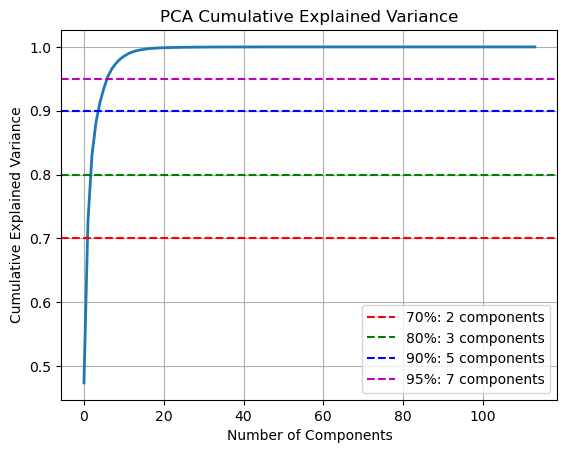

Components required: 70% - 2, 80% - 3, 90% - 5, 95% - 7


In [14]:
cumulative_var = np.cumsum(pca1.explained_variance_ratio_)

# Remember you need to find the explained variance ratio to determine how much of the total variance is captured/explained by each component

thresholds = [0.7, 0.8, 0.9, 0.95]
k_values = [np.argmax(cumulative_var >= t) + 1 for t in thresholds]

plt.figure()
plt.plot(cumulative_var, linewidth=2)
colors = ['r', 'g', 'b', 'm']
for t, k, c in zip(thresholds, k_values, colors):
    plt.axhline(y=t, color=c, linestyle='--', label=f'{int(t*100)}%: {k} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.title('PCA Cumulative Explained Variance')
plt.show()

print(f"Components required: 70% - {k_values[0]}, 80% - {k_values[1]}, 90% - {k_values[2]}, 95% - {k_values[3]}")


## Task 3

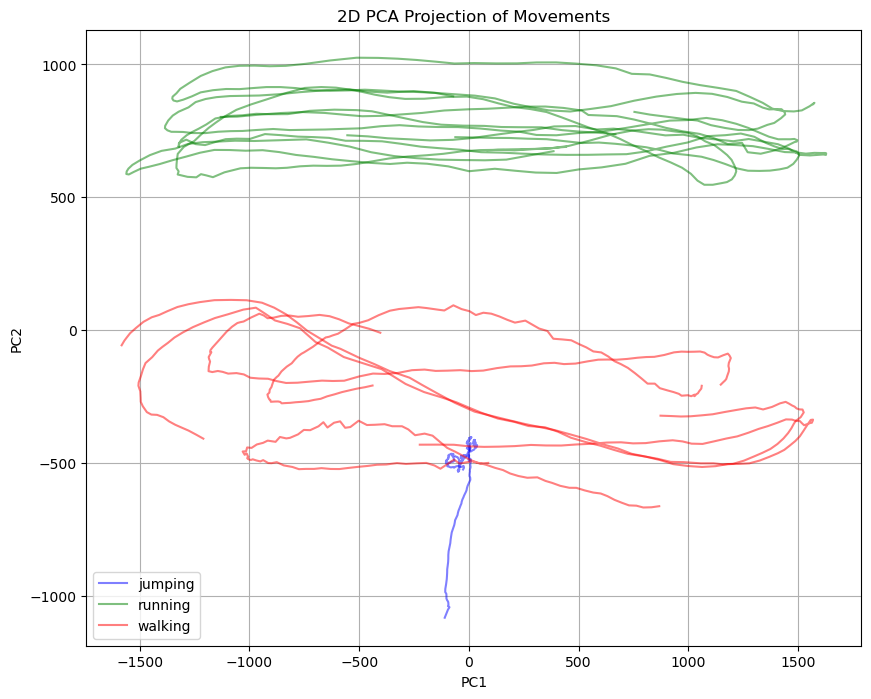

In [15]:
labels = np.repeat([0, 1, 2], repeats=5*100).reshape(15, 100).T.flatten()

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

samples_pca2 = [X_pca2[i*100:(i+1)*100] for i in range(15)]
samples_pca3 = [X_pca3[i*100:(i+1)*100] for i in range(15)]

plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
for i, sample in enumerate(samples_pca2):
    movement = i // 5
    plt.plot(sample[:, 0], sample[:, 1], color=colors[movement], alpha=0.5, label=movements[movement] if i % 5 == 0 else "")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection of Movements')
plt.legend()
plt.grid()
plt.show()

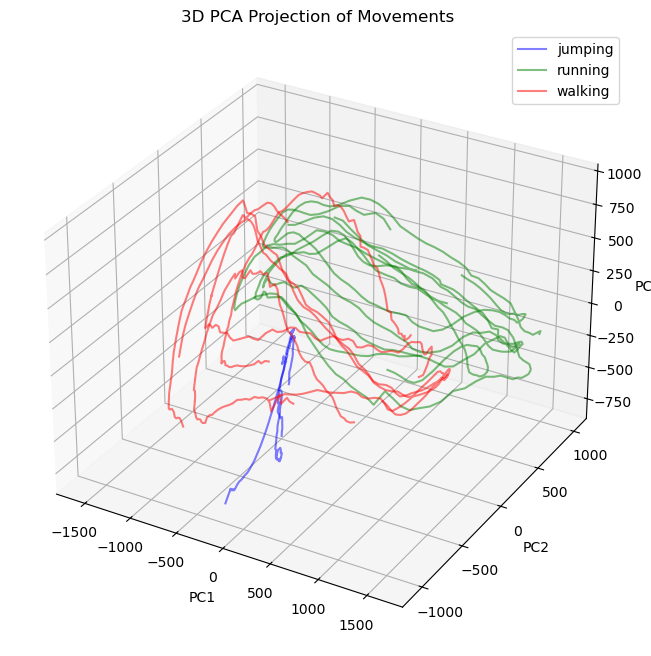

In [16]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i, sample in enumerate(samples_pca3):
    movement = i //5
    ax.plot(sample[:, 0], sample[:, 1], sample[:, 2], color=colors[movement], alpha=0.5, label=movements[movement] if i%5 ==0 else "")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection of Movements')
plt.legend()
plt.show()